## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Seeding for reproducibility

In [2]:
SEED = 50

## Generating the arrays

In [3]:
# Seed
np.random.seed(SEED)

# Generated arrays
n = 50
a = np.random.uniform(low = 0.5, high = 2, size = n)
b = np.random.normal(loc = 0, scale = 1, size = n)

# Problem constant
d = 5.0

# Precompute summations for the closed-form solutions
sum_inv_a = np.sum(1.0 / a)
sum_b_over_a = np.sum(b / a)

## Hyperparameters

In [4]:
iters = 200
# Step size for Dual Ascent
alpha = 0.01
# Penalty parameter for QP and MoM
rho = 1.0

In [5]:
# Dual Ascent
r_A, f_A, lam_A_hist = np.zeros(iters), np.zeros(iters), np.zeros(iters)

# Quadratic Penalty
r_B, f_B = np.zeros(iters), np.zeros(iters)

# Method of Multipliers
r_C, f_C, lam_C_hist = np.zeros(iters), np.zeros(iters), np.zeros(iters)

# Initialize dual variables
lam_A = 0.0
lam_C = 0.0

## Iterations

In [6]:
# Objective function calculator
def calc_f(x):
    return np.sum(0.5 * a * x**2 + b * x)

for k in range(iters):
    # Dual Ascent
    x_A = -(b + lam_A) / a
    res_A = np.sum(x_A) - d

    # Store metrics
    r_A[k] = res_A
    f_A[k] = calc_f(x_A)
    lam_A_hist[k] = lam_A

    # Update dual variable
    lam_A += alpha * res_A

    # Quadratic Penalty
    S_B = (-d - sum_b_over_a) / (1.0 + rho * sum_inv_a)
    x_B = -(b + rho * S_B) / a

    # Store metrics
    r_B[k] = np.sum(x_B) - d
    f_B[k] = calc_f(x_B)

    # Method of Multipliers (MoM)
    S_C = (-d - sum_b_over_a - lam_C * sum_inv_a) / (1.0 + rho * sum_inv_a)
    x_C = -(b + lam_C + rho * S_C) / a
    res_C = np.sum(x_C) - d

    # Store metrics
    r_C[k] = res_C
    f_C[k] = calc_f(x_C)
    lam_C_hist[k] = lam_C

    # Update dual variable
    lam_C += rho * res_C

## Plots

<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1609882310.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('Dual Variable $\lambda_k$')


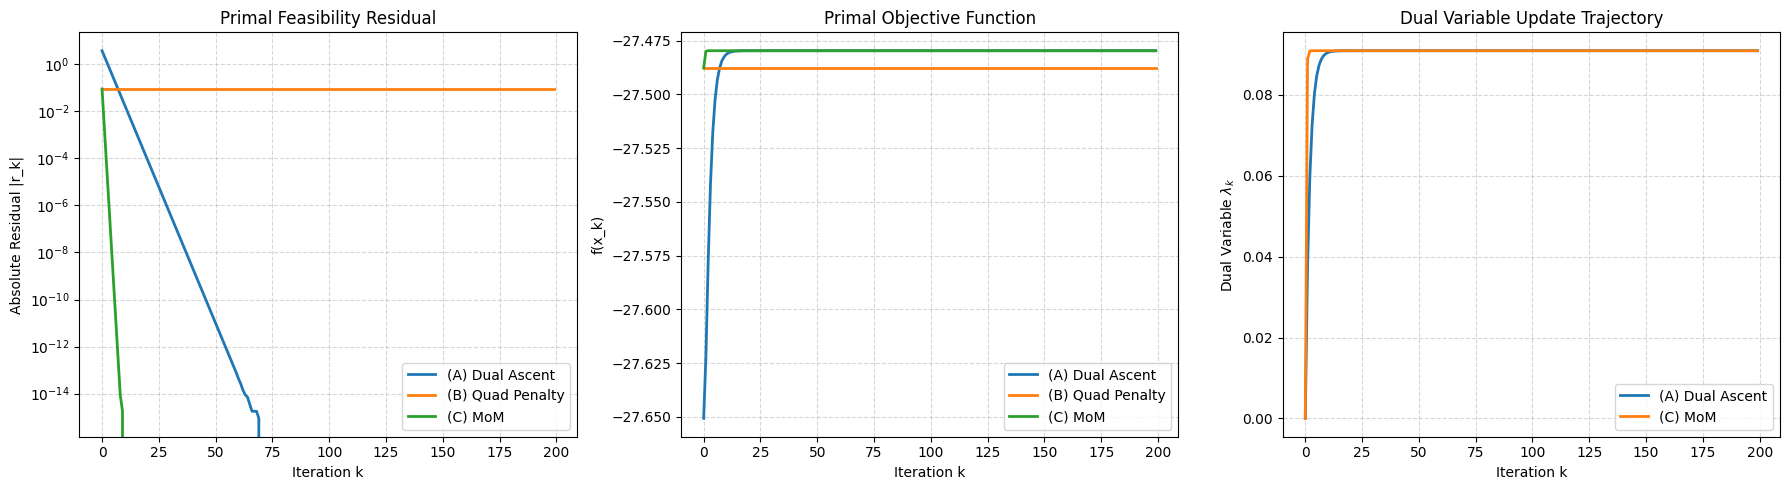

In [7]:
plt.figure(figsize=(18, 5))

# Primal Residual |r_k|
plt.subplot(1, 3, 1)
plt.plot(np.abs(r_A), label='(A) Dual Ascent', linewidth=2)
plt.plot(np.abs(r_B), label='(B) Quad Penalty', linewidth=2)
plt.plot(np.abs(r_C), label='(C) MoM', linewidth=2)
plt.yscale('log')
plt.xlabel('Iteration k')
plt.ylabel('Absolute Residual |r_k|')
plt.title('Primal Feasibility Residual')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()

# Objective Function f(x_k)
plt.subplot(1, 3, 2)
plt.plot(f_A, label='(A) Dual Ascent', linewidth=2)
plt.plot(f_B, label='(B) Quad Penalty', linewidth=2)
plt.plot(f_C, label='(C) MoM', linewidth=2)
plt.xlabel('Iteration k')
plt.ylabel('f(x_k)')
plt.title('Primal Objective Function')
plt.grid(True, ls="--", alpha=0.5)
plt.legend()

# Dual Variable Trajectory
plt.subplot(1, 3, 3)
plt.plot(lam_A_hist, label='(A) Dual Ascent', linewidth=2)
plt.plot(lam_C_hist, label='(C) MoM', linewidth=2)
plt.xlabel('Iteration k')
plt.ylabel('Dual Variable $\lambda_k$')
plt.title('Dual Variable Update Trajectory')
plt.grid(True, ls="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter scaling for method of multipliers

In [8]:
# Hyperparameter Scaling Law
print("MoM Iterations to reach |r_k| <= 1e-6")

rhos_to_test = [0.1, 1, 10, 100]
tolerance = 1e-6
max_iters = 1000

for test_rho in rhos_to_test:
    lam_test = 0.0
    iters_needed = max_iters

    for k in range(max_iters):
        # MoM closed-form logic
        S_test = (-d - sum_b_over_a - lam_test * sum_inv_a) / (1.0 + test_rho * sum_inv_a)
        x_test = -(b + lam_test + test_rho * S_test) / a
        r_test = np.sum(x_test) - d

        if abs(r_test) <= tolerance:
            iters_needed = k + 1
            break

        lam_test += test_rho * r_test

    print(f"rho = {test_rho:5.1f} : {iters_needed} iterations")

MoM Iterations to reach |r_k| <= 1e-6
rho =   0.1 : 10 iterations
rho =   1.0 : 5 iterations
rho =  10.0 : 3 iterations
rho = 100.0 : 2 iterations
